<a href="https://colab.research.google.com/github/sureshvit/Traffic-Flow-prediction-Machine-Learning/blob/main/Traffic_Flow_Prediction(Capstone).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Traffic Flow Prediction Using Machine Learning, Ensemble & Deep Learning Models**

In [ ]:
# import the needable python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mount the Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
# import the dataset & assign dataset into 'df' variable
df=pd.read_csv("/content/drive/My Drive/Capstone/Traffic_data.csv")

In [ ]:
# Display the first 5 rows in dataset using head() function
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [ ]:
# Display the last 5 rows in dataset using tail() function
df.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [ ]:
# Display the rows & columns in dataset
df.shape

(48204, 9)

**Data Pre Processing & Visualizations**

In [ ]:
# Display the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [ ]:
# Display the datatypes of all the features of the dataset
df.dtypes

holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
traffic_volume           int64
dtype: object

In [ ]:
# Display the statisical information of the dataset in numerical features of the dataset
df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [ ]:
# Displat missing values & null values details
df.isnull().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

In [ ]:
# Display the unique values of holiday
df.holiday.unique()

array(['None', 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

In [ ]:
# Display the unique values of temperature
df.temp.unique()

array([288.28, 289.36, 289.58, ..., 306.08, 304.41, 304.9 ])

In [ ]:
# Display the unique values of snow_1h column
df.snow_1h.unique()

array([0.  , 0.51, 0.32, 0.06, 0.05, 0.21, 0.25, 0.44, 0.13, 0.1 , 0.17,
       0.08])

In [ ]:
# Display the unique values of weather_main column
df.weather_main.unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Squall', 'Smoke'], dtype=object)

In [ ]:
# Display the unique values of weather_description column
df.weather_description.unique()

array(['scattered clouds', 'broken clouds', 'overcast clouds',
       'sky is clear', 'few clouds', 'light rain',
       'light intensity drizzle', 'mist', 'haze', 'fog',
       'proximity shower rain', 'drizzle', 'moderate rain',
       'heavy intensity rain', 'proximity thunderstorm',
       'thunderstorm with light rain', 'proximity thunderstorm with rain',
       'heavy snow', 'heavy intensity drizzle', 'snow',
       'thunderstorm with heavy rain', 'freezing rain', 'shower snow',
       'light rain and snow', 'light intensity shower rain', 'SQUALLS',
       'thunderstorm with rain', 'proximity thunderstorm with drizzle',
       'thunderstorm', 'Sky is Clear', 'very heavy rain',
       'thunderstorm with light drizzle', 'light snow',
       'thunderstorm with drizzle', 'smoke', 'shower drizzle',
       'light shower snow', 'sleet'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


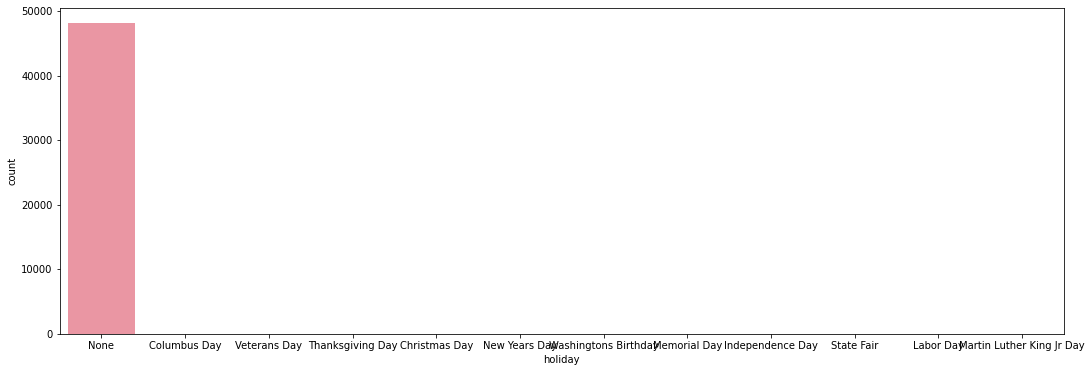

In [ ]:
# Display the countplot for Holiday
plt.figure(figsize=(18,6))
sns.countplot(df['holiday'])
plt.show()

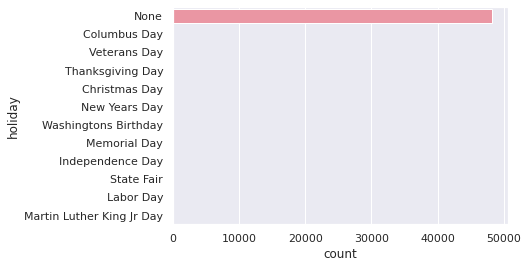

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(y="holiday",data=df)

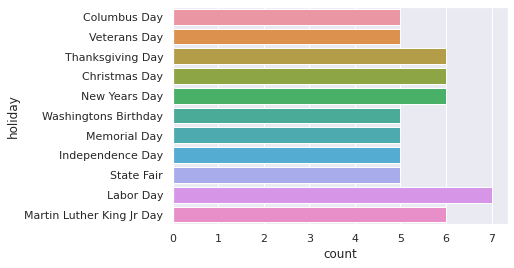

In [ ]:
other_days=df.loc[df.holiday!='None']
sns.set_theme(style="darkgrid")
sns.countplot(y="holiday" , data=other_days)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


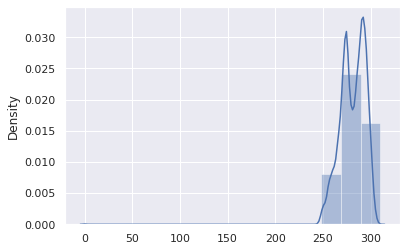

In [ ]:
# Distribution plot in temp(Kevin) feature
sns.distplot(x=df['temp'],bins=15)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


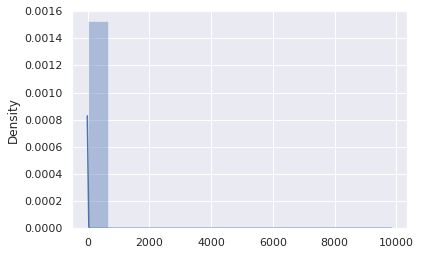

In [ ]:
# Distribution plot in rain_1h(mm) feature
sns.distplot(x=df['rain_1h'],bins=15)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


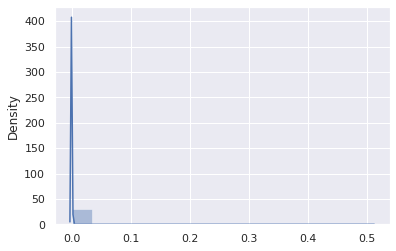

In [ ]:
# Distribution plot in snow_1h feature
sns.distplot(x=df['snow_1h'],bins=15)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


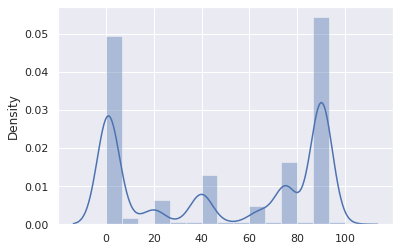

In [ ]:
# Distribution plot in clouds_all feature
sns.distplot(x=df['clouds_all'],bins=15)

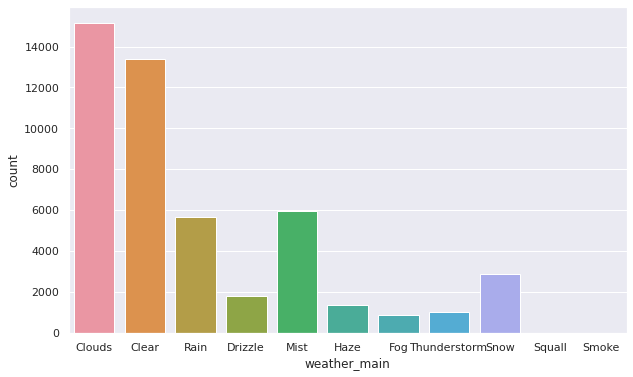

In [ ]:
# Count plot in weather_main feature
plt.figure(figsize=(10,6))
sns.countplot(x=df['weather_main'])
plt.show()

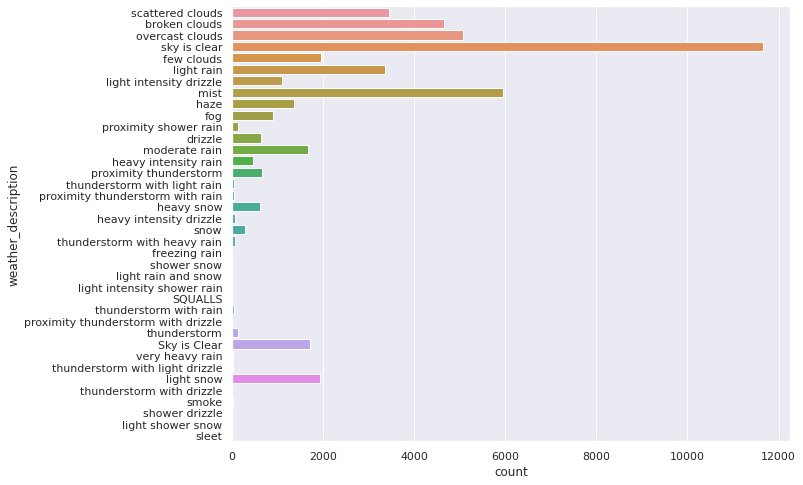

In [ ]:
# Count plot in weather_description feature
plt.figure(figsize=(10,8))
sns.countplot(y=df['weather_description'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


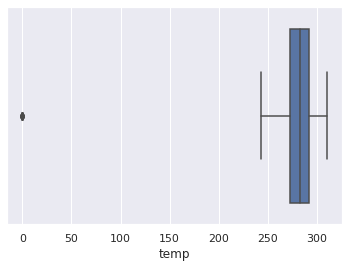

In [ ]:
# Box Plot for temperature
sns.boxplot(df["temp"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


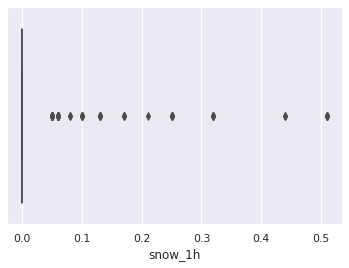

In [ ]:
# Box plot for snow
sns.boxplot(df['snow_1h'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


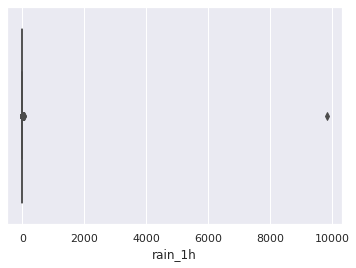

In [ ]:
# Box plot for rain
sns.boxplot(df['rain_1h'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


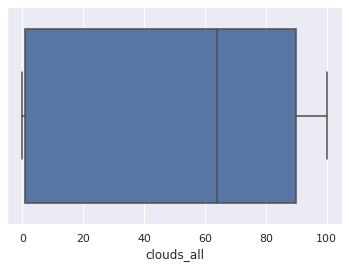

In [ ]:
# Box plot for clouds
sns.boxplot(df['clouds_all'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


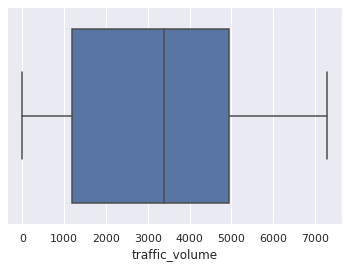

In [ ]:
# Box plot for Traffic Volume
sns.boxplot(df['traffic_volume'])

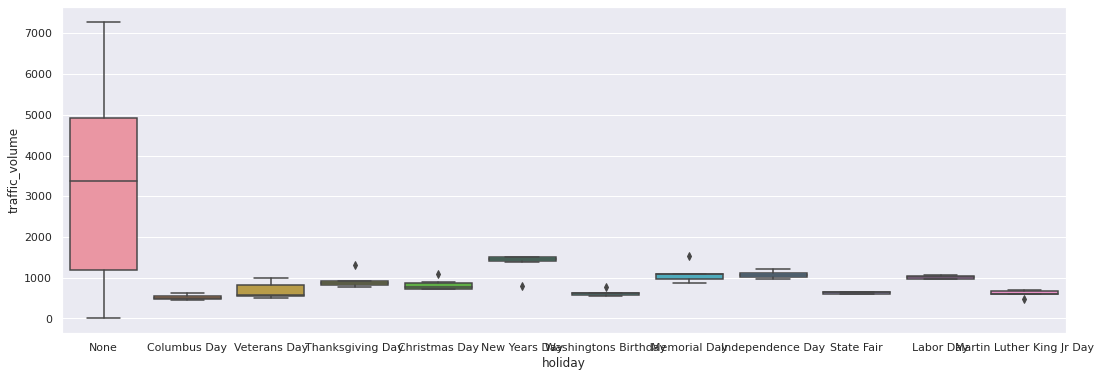

In [ ]:
# Box plot for Holiday vs Traffic volume
plt.figure(figsize=(18,6))
sns.boxplot(x="holiday" , y="traffic_volume" , data=df)
plt.show()

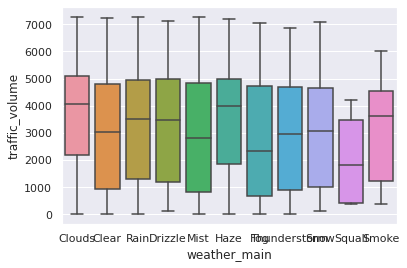

In [ ]:
# Box plot for Weather_main vs Traffic volume
sns.boxplot(x="weather_main", y="traffic_volume",data=df)

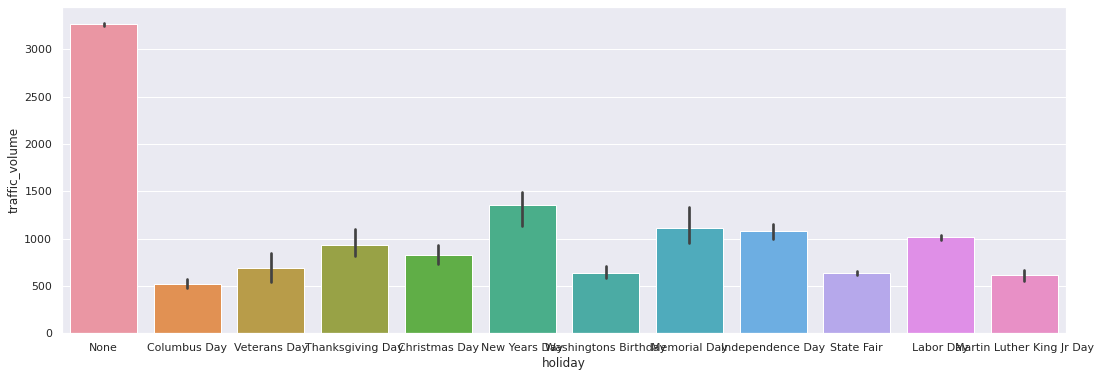

In [ ]:
# Barplot for holiday against Traffic volume
plt.figure(figsize=(18,6))
sns.barplot(x=df['holiday'],y=df['traffic_volume'])
plt.show()

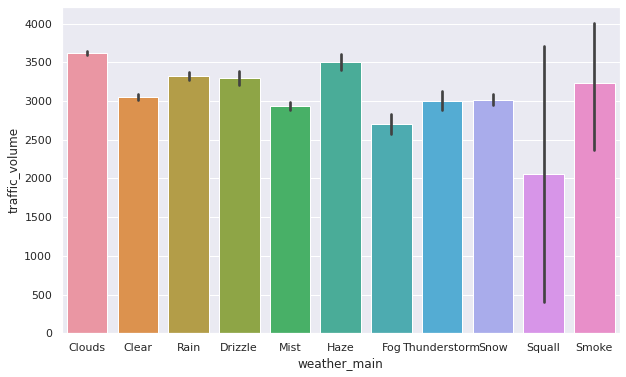

In [ ]:
# Barplot for weather_main against Traffic volume
plt.figure(figsize=(10,6))
sns.barplot(x=df['weather_main'],y=df['traffic_volume'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


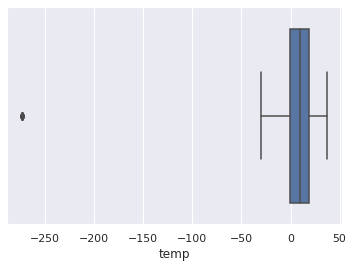

In [ ]:
# Temperature is measured by kelvin so convert the kelvin to degree celsius
# (0K - 273.15)
df['temp']=(df['temp']-273.15)
plt.figure(figsize=(6,4))
sns.boxplot('temp', data=df)
plt.show()

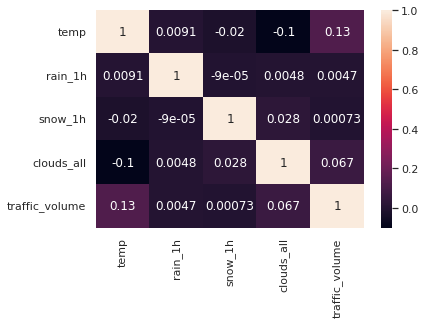

In [ ]:
# correlation graph for all numerical features
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
df_features=df.copy()

In [ ]:
df_features.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,15.13,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,16.21,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,16.43,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,16.98,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,17.99,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [ ]:
#Extracting features from date_time variable

# Monday to sunday equals to 0 to 6
df_features['date_time']=pd.to_datetime(df_features.date_time)
df_features['weekday']=df_features.date_time.dt.weekday
df_features['date']=df_features.date_time.dt.date
df_features['hour']=df_features.date_time.dt.hour
df_features['month']=df_features.date_time.dt.month
df_features['year']=df_features.date_time.dt.year

In [ ]:
df_features.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,month,year
0,None,15.13,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1,2012-10-02,9,10,2012
1,None,16.21,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1,2012-10-02,10,10,2012
2,None,16.43,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1,2012-10-02,11,10,2012
3,None,16.98,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1,2012-10-02,12,10,2012
4,None,17.99,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1,2012-10-02,13,10,2012


In [ ]:
# Categorize the hours to different time periods like morning, afternoon

def hours_modify(x):
  Early_Morning=[4,5,6,7]
  Morning=[8,9,10,11]
  Afternoon=[12,13,14,15]
  Evening=[16,17,18,19]
  Night=[20,21,22,23]
  Late_Night=[24,1,2,3]

  if x in Early_Morning:
    return 'Early_Morning'
  elif x in Morning:
    return 'Morning'
  elif x in Afternoon:
    return 'Afternoon'
  elif x in Evening:
    return 'Evening'
  elif x in Night:
    return 'Night'
  else:
    return 'Late_Night'

df_features['hour']=df_features.hour.map(hours_modify)

In [ ]:
df_features.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,month,year
0,None,15.13,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1,2012-10-02,Morning,10,2012
1,None,16.21,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1,2012-10-02,Morning,10,2012
2,None,16.43,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1,2012-10-02,Morning,10,2012
3,None,16.98,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1,2012-10-02,Afternoon,10,2012
4,None,17.99,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1,2012-10-02,Afternoon,10,2012


In [ ]:
df_features.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,month,year
48199,None,10.30,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,6,2018-09-30,Evening,9,2018
48200,None,9.61,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,6,2018-09-30,Night,9,2018
48201,None,9.58,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,6,2018-09-30,Night,9,2018
48202,None,8.94,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,6,2018-09-30,Night,9,2018
48203,None,8.97,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954,6,2018-09-30,Night,9,2018


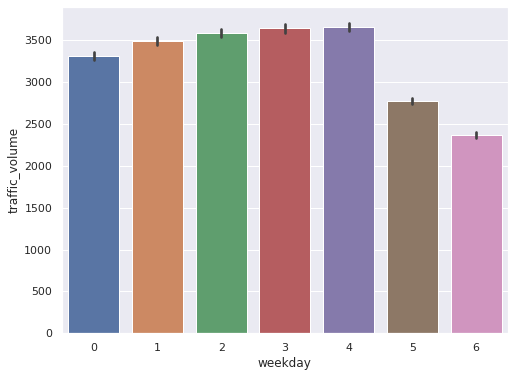

In [ ]:
# Traffic volume ploted against week day
plt.figure(figsize=(8,6))
sns.barplot(x='weekday', y='traffic_volume',data=df_features)
plt.show()

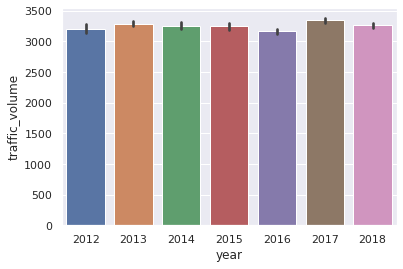

In [ ]:
# Barplot for year against Traffic volume
sns.barplot(x='year',y='traffic_volume',data=df_features)

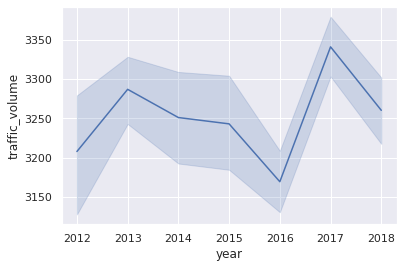

In [ ]:
# Line plot for holiday against Traffic volume
sns.lineplot(x='year',y='traffic_volume',data=df_features)

In [ ]:
def modify_holiday(x):
  if x=='None':
    return False
  else:
    return True

df_features['holiday']=df_features.holiday.map(modify_holiday);

In [ ]:
df_features.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,month,year
0,False,15.13,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1,2012-10-02,Morning,10,2012
1,False,16.21,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1,2012-10-02,Morning,10,2012
2,False,16.43,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1,2012-10-02,Morning,10,2012
3,False,16.98,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1,2012-10-02,Afternoon,10,2012
4,False,17.99,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1,2012-10-02,Afternoon,10,2012


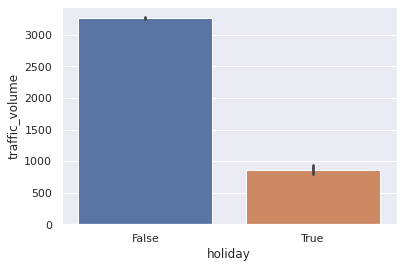

In [ ]:
sns.barplot(x='holiday',y='traffic_volume',data=df_features)

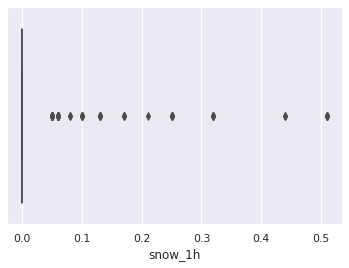

In [ ]:
# Ploting the snow_1h
sns.boxplot(x='snow_1h',data=df_features)

In [ ]:
df_features.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,month,year
0,False,15.13,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1,2012-10-02,Morning,10,2012
1,False,16.21,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1,2012-10-02,Morning,10,2012
2,False,16.43,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1,2012-10-02,Morning,10,2012
3,False,16.98,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1,2012-10-02,Afternoon,10,2012
4,False,17.99,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1,2012-10-02,Afternoon,10,2012


In [ ]:
df_features.snow_1h[df_features.snow_1h>0].count()

63

In [ ]:
df_features.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,month,year
0,False,15.13,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1,2012-10-02,Morning,10,2012
1,False,16.21,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1,2012-10-02,Morning,10,2012
2,False,16.43,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1,2012-10-02,Morning,10,2012
3,False,16.98,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1,2012-10-02,Afternoon,10,2012
4,False,17.99,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1,2012-10-02,Afternoon,10,2012


In [ ]:
df_features.groupby('weather_description').aggregate({'traffic_volume':[np.mean,np.size],
                                                              'clouds_all':'count','rain_1h':'mean','snow_1h':'mean'})

traffic_volume        clouds_all  \
                                              mean   size      count   
weather_description                                                    
SQUALLS                                2061.750000      4          4   
Sky is Clear                           3423.148899   1726       1726   
broken clouds                          3661.142092   4666       4666   
drizzle                                3094.858679    651        651   
few clouds                             3691.453476   1956       1956   
fog                                    2703.720395    912        912   
freezing rain                          4314.000000      2          2   
haze                                   3502.101471   1360       1360   
heavy intensity drizzle                3371.109375     64         64   
heavy intensity rain                   3140.072805    467        467   
heavy snow                             3031.472403    616        616   
light intensity drizzle                3400.567273   1100       1100   
light intensity shower rain            4140.307692     13         13   
light rain                             3349.257117   3372       3372   
light rain and snow                    3961.166667      6          6   
light shower snow                      4618.636364     11         11   
light snow                             3042.770298   1946       1946   
mist                                   2932.956639   5950       5950   
moderate rain                          3202.603966   1664       1664   
overcast clouds                        3375.963590   5081       5081   
proximity shower rain                  4567.845588    136        136   
proximity thunderstorm                 3076.457652    673        673   
proximity thunderstorm with drizzle    3117.538462     13         13   
proximity thunderstorm with rain       2819.269231     52         52   
scattered clouds                       3875.622363   3461       3461   
shower drizzle                         3547.666667      6          6   
shower snow                            5664.000000      1          1   
sky is clear                           3001.570510  11665      11665   
sleet                                  4312.666667      3          3   
smoke                                  3237.650000     20         20   
snow                                   2712.122867    293        293   
thunderstorm                           2843.752000    125        125   
thunderstorm with drizzle              2297.000000      2          2   
thunderstorm with heavy rain           2631.142857     63         63   
thunderstorm with light drizzle        2779.266667     15         15   
thunderstorm with light rain           2776.833333     54         54   
thunderstorm with rain                 3476.405405     37         37   
very heavy rain                        2568.833333     18         18   

                                        rain_1h   snow_1h  
                                           mean      mean  
weather_description                                        
SQUALLS                                3.482500  0.000000  
Sky is Clear                           0.000000  0.000000  
broken clouds                          0.000000  0.000000  
drizzle                                0.118710  0.000000  
few clouds                             0.000000  0.000000  
fog                                    0.087007  0.000625  
freezing rain                          0.000000  0.000000  
haze                                   0.046868  0.000000  
heavy intensity drizzle                0.170156  0.000000  
heavy intensity rain                   2.656660  0.000000  
heavy snow                             0.001234  0.000000  
light intensity drizzle                0.180600  0.000000  
light intensity shower rain            0.333077  0.000000  
light rain                             0.129404  0.000068  
light rain and snow                    0.211667  0.000000  
lig

In [ ]:
df_features['weather_description'] = df_features['weather_description'].map(lambda x:x.lower())

In [ ]:
df_features['weather_description'].unique()

array(['scattered clouds', 'broken clouds', 'overcast clouds',
       'sky is clear', 'few clouds', 'light rain',
       'light intensity drizzle', 'mist', 'haze', 'fog',
       'proximity shower rain', 'drizzle', 'moderate rain',
       'heavy intensity rain', 'proximity thunderstorm',
       'thunderstorm with light rain', 'proximity thunderstorm with rain',
       'heavy snow', 'heavy intensity drizzle', 'snow',
       'thunderstorm with heavy rain', 'freezing rain', 'shower snow',
       'light rain and snow', 'light intensity shower rain', 'squalls',
       'thunderstorm with rain', 'proximity thunderstorm with drizzle',
       'thunderstorm', 'very heavy rain',
       'thunderstorm with light drizzle', 'light snow',
       'thunderstorm with drizzle', 'smoke', 'shower drizzle',
       'light shower snow', 'sleet'], dtype=object)

In [ ]:
df_features.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,month,year
48199,False,10.30,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,6,2018-09-30,Evening,9,2018
48200,False,9.61,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,6,2018-09-30,Night,9,2018
48201,False,9.58,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,6,2018-09-30,Night,9,2018
48202,False,8.94,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,6,2018-09-30,Night,9,2018
48203,False,8.97,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954,6,2018-09-30,Night,9,2018


In [ ]:
df_features.loc[df_features['weather_description'].str.contains('thunderstorm'),'weather_description'] = 'thunderstorm'

In [ ]:
df_features.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,month,year
48199,False,10.30,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,6,2018-09-30,Evening,9,2018
48200,False,9.61,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,6,2018-09-30,Night,9,2018
48201,False,9.58,0.0,0.0,90,Thunderstorm,thunderstorm,2018-09-30 21:00:00,2159,6,2018-09-30,Night,9,2018
48202,False,8.94,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,6,2018-09-30,Night,9,2018
48203,False,8.97,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954,6,2018-09-30,Night,9,2018


In [ ]:
weather = ['thunderstorm','mist','fog','haze']
df_features.loc[np.logical_not(df_features['weather_description'].isin(weather)),'weather_description'] = 'other'

In [ ]:
df_features.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,month,year
0,False,15.13,0.0,0.0,40,Clouds,other,2012-10-02 09:00:00,5545,1,2012-10-02,Morning,10,2012
1,False,16.21,0.0,0.0,75,Clouds,other,2012-10-02 10:00:00,4516,1,2012-10-02,Morning,10,2012
2,False,16.43,0.0,0.0,90,Clouds,other,2012-10-02 11:00:00,4767,1,2012-10-02,Morning,10,2012
3,False,16.98,0.0,0.0,90,Clouds,other,2012-10-02 12:00:00,5026,1,2012-10-02,Afternoon,10,2012
4,False,17.99,0.0,0.0,75,Clouds,other,2012-10-02 13:00:00,4918,1,2012-10-02,Afternoon,10,2012


In [ ]:
df_features.weather_description.value_counts()

other           38948
mist             5950
haze             1360
thunderstorm     1034
fog               912
Name: weather_description, dtype: int64

In [ ]:
df_features=pd.get_dummies(columns=['weather_description'],data=df_features)

In [ ]:
df_features.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'date_time', 'traffic_volume', 'weekday', 'date', 'hour', 'month',
       'year', 'weather_description_fog', 'weather_description_haze',
       'weather_description_mist', 'weather_description_other',
       'weather_description_thunderstorm'],
      dtype='object')

In [ ]:
df_features.rename(columns={'weather_description_fog':'fog','weather_description_mist':'mist','weather_description_thunderstorm':'thunderstorm',
                            'weather_description_haze':'haze'},inplace=True)

In [ ]:
df_features.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'date_time', 'traffic_volume', 'weekday', 'date', 'hour', 'month',
       'year', 'fog', 'haze', 'mist', 'weather_description_other',
       'thunderstorm'],
      dtype='object')

In [ ]:
df_features.drop(columns=['weather_description_other','weather_main'],inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


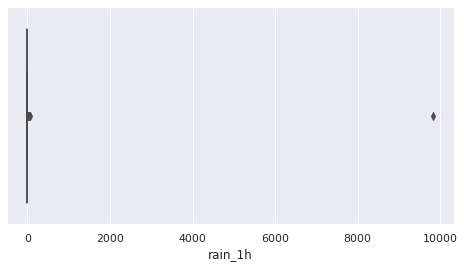

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot('rain_1h',data=df_features)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


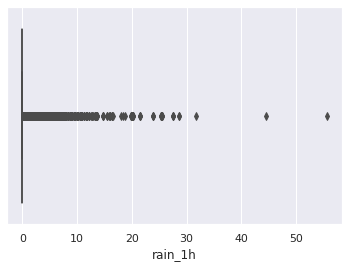

In [ ]:
sns.boxplot('rain_1h',data=df_features.loc[df_features.rain_1h<2000])

In [ ]:
df_features=df_features.loc[df_features.rain_1h<2000]

In [ ]:
df_features_rain=df_features.loc[df_features.rain_1h>0]

In [ ]:
rain_qcut=pd.DataFrame(pd.qcut(df_features_rain['rain_1h'],q=3,labels=['light','moderate','heavy']))

In [ ]:
rain_qcut.head()

,rain_1h
6688,light
6689,light
6690,light
6691,light
6693,light


In [ ]:
rain_qcut.shape

(3466, 1)

In [ ]:
df_cat = df_features.merge(rain_qcut,left_index=True, right_index=True, how='left')
df_cat['rain_1h_y'] = df_cat.rain_1h_y.cat.add_categories('no_rain')
df_cat['rain_1h_y'].fillna('no_rain', inplace = True)

df_cat.drop(columns=['rain_1h_x'], inplace = True)
df_cat.rename(columns={'rain_1h_y':'rain_1h'}, inplace = True)
df_cat.head()

,holiday,temp,snow_1h,clouds_all,date_time,traffic_volume,weekday,date,hour,month,year,fog,haze,mist,thunderstorm,rain_1h
0,False,15.13,0.0,40,2012-10-02 09:00:00,5545,1,2012-10-02,Morning,10,2012,0,0,0,0,no_rain
1,False,16.21,0.0,75,2012-10-02 10:00:00,4516,1,2012-10-02,Morning,10,2012,0,0,0,0,no_rain
2,False,16.43,0.0,90,2012-10-02 11:00:00,4767,1,2012-10-02,Morning,10,2012,0,0,0,0,no_rain
3,False,16.98,0.0,90,2012-10-02 12:00:00,5026,1,2012-10-02,Afternoon,10,2012,0,0,0,0,no_rain
4,False,17.99,0.0,75,2012-10-02 13:00:00,4918,1,2012-10-02,Afternoon,10,2012,0,0,0,0,no_rain


In [ ]:
df_cat.head()

,holiday,temp,snow_1h,clouds_all,date_time,traffic_volume,weekday,date,hour,month,year,fog,haze,mist,thunderstorm,rain_1h
0,False,15.13,0.0,40,2012-10-02 09:00:00,5545,1,2012-10-02,Morning,10,2012,0,0,0,0,no_rain
1,False,16.21,0.0,75,2012-10-02 10:00:00,4516,1,2012-10-02,Morning,10,2012,0,0,0,0,no_rain
2,False,16.43,0.0,90,2012-10-02 11:00:00,4767,1,2012-10-02,Morning,10,2012,0,0,0,0,no_rain
3,False,16.98,0.0,90,2012-10-02 12:00:00,5026,1,2012-10-02,Afternoon,10,2012,0,0,0,0,no_rain
4,False,17.99,0.0,75,2012-10-02 13:00:00,4918,1,2012-10-02,Afternoon,10,2012,0,0,0,0,no_rain


In [ ]:
df_features.snow_1h[df_features.snow_1h>0].count()

63

In [ ]:
def modify_snow1h(x):
  if x==0:
    return 'no_snow'
  else:
    return 'snow'

df_cat['snow_1h']=df_cat.snow_1h.map(modify_snow1h)

In [ ]:
def modify_fog(x):
  if x==0:
    return 'no_fog'
  else:
    return 'fog'

df_cat['fog']=df_cat.fog.map(modify_fog)

In [ ]:
def modify_haze(x):
  if x==0:
    return 'no_haze'
  else:
    return 'haze'

df_cat['haze']=df_cat.haze.map(modify_haze)

In [ ]:
def modify_mist(x):
  if x==0:
    return 'no_mist'
  else:
    return 'mist'

df_cat['mist']=df_cat.mist.map(modify_mist)

In [ ]:
def modify_thunder(x):
  if x==0:
    return 'no_thunder'
  else:
    return 'thunder'

df_cat['thunderstorm']=df_cat.thunderstorm.map(modify_thunder)

In [ ]:
df_cat.head()

,holiday,temp,snow_1h,clouds_all,date_time,traffic_volume,weekday,date,hour,month,year,fog,haze,mist,thunderstorm,rain_1h
0,False,15.13,no_snow,40,2012-10-02 09:00:00,5545,1,2012-10-02,Morning,10,2012,no_fog,no_haze,no_mist,no_thunder,no_rain
1,False,16.21,no_snow,75,2012-10-02 10:00:00,4516,1,2012-10-02,Morning,10,2012,no_fog,no_haze,no_mist,no_thunder,no_rain
2,False,16.43,no_snow,90,2012-10-02 11:00:00,4767,1,2012-10-02,Morning,10,2012,no_fog,no_haze,no_mist,no_thunder,no_rain
3,False,16.98,no_snow,90,2012-10-02 12:00:00,5026,1,2012-10-02,Afternoon,10,2012,no_fog,no_haze,no_mist,no_thunder,no_rain
4,False,17.99,no_snow,75,2012-10-02 13:00:00,4918,1,2012-10-02,Afternoon,10,2012,no_fog,no_haze,no_mist,no_thunder,no_rain


In [ ]:
df_traffic_features=df_cat.copy()

In [ ]:
df_traffic_features.head()

,holiday,temp,snow_1h,clouds_all,date_time,traffic_volume,weekday,date,hour,month,year,fog,haze,mist,thunderstorm,rain_1h
0,False,15.13,no_snow,40,2012-10-02 09:00:00,5545,1,2012-10-02,Morning,10,2012,no_fog,no_haze,no_mist,no_thunder,no_rain
1,False,16.21,no_snow,75,2012-10-02 10:00:00,4516,1,2012-10-02,Morning,10,2012,no_fog,no_haze,no_mist,no_thunder,no_rain
2,False,16.43,no_snow,90,2012-10-02 11:00:00,4767,1,2012-10-02,Morning,10,2012,no_fog,no_haze,no_mist,no_thunder,no_rain
3,False,16.98,no_snow,90,2012-10-02 12:00:00,5026,1,2012-10-02,Afternoon,10,2012,no_fog,no_haze,no_mist,no_thunder,no_rain
4,False,17.99,no_snow,75,2012-10-02 13:00:00,4918,1,2012-10-02,Afternoon,10,2012,no_fog,no_haze,no_mist,no_thunder,no_rain


In [ ]:
df_traffic_features.set_index('date',inplace=True)

In [ ]:
df_traffic_features.head()

,holiday,temp,snow_1h,clouds_all,date_time,traffic_volume,weekday,hour,month,year,fog,haze,mist,thunderstorm,rain_1h
date,,,,,,,,,,,,,,,
2012-10-02,False,15.13,no_snow,40,2012-10-02 09:00:00,5545,1,Morning,10,2012,no_fog,no_haze,no_mist,no_thunder,no_rain
2012-10-02,False,16.21,no_snow,75,2012-10-02 10:00:00,4516,1,Morning,10,2012,no_fog,no_haze,no_mist,no_thunder,no_rain
2012-10-02,False,16.43,no_snow,90,2012-10-02 11:00:00,4767,1,Morning,10,2012,no_fog,no_haze,no_mist,no_thunder,no_rain
2012-10-02,False,16.98,no_snow,90,2012-10-02 12:00:00,5026,1,Afternoon,10,2012,no_fog,no_haze,no_mist,no_thunder,no_rain
2012-10-02,False,17.99,no_snow,75,2012-10-02 13:00:00,4918,1,Afternoon,10,2012,no_fog,no_haze,no_mist,no_thunder,no_rain




```
# This is formatted as code
```

**Encoding the categorical values**

In [ ]:
# Encoding for all the categorical features
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_traffic_features['snow_1h']=le.fit_transform(df_traffic_features['snow_1h'])
df_traffic_features['holiday']=le.fit_transform(df_traffic_features['holiday'])
df_traffic_features['hour']=le.fit_transform(df_traffic_features['hour'])
df_traffic_features['fog']=le.fit_transform(df_traffic_features['fog'])
df_traffic_features['haze']=le.fit_transform(df_traffic_features['haze'])
df_traffic_features['mist']=le.fit_transform(df_traffic_features['mist'])
df_traffic_features['thunderstorm']=le.fit_transform(df_traffic_features['thunderstorm'])
df_traffic_features['weekday']=le.fit_transform(df_traffic_features['weekday'])
df_traffic_features['rain_1h']=le.fit_transform(df_traffic_features['rain_1h'])
df_traffic_features['month']=le.fit_transform(df_traffic_features['month'])

In [ ]:
df_traffic_features.head()

,holiday,temp,snow_1h,clouds_all,date_time,traffic_volume,weekday,hour,month,year,fog,haze,mist,thunderstorm,rain_1h
date,,,,,,,,,,,,,,,
2012-10-02,0,15.13,0,40,2012-10-02 09:00:00,5545,1,4,9,2012,1,1,1,0,3
2012-10-02,0,16.21,0,75,2012-10-02 10:00:00,4516,1,4,9,2012,1,1,1,0,3
2012-10-02,0,16.43,0,90,2012-10-02 11:00:00,4767,1,4,9,2012,1,1,1,0,3
2012-10-02,0,16.98,0,90,2012-10-02 12:00:00,5026,1,0,9,2012,1,1,1,0,3
2012-10-02,0,17.99,0,75,2012-10-02 13:00:00,4918,1,0,9,2012,1,1,1,0,3


In [ ]:
df_traffic_features.head()

,holiday,temp,snow_1h,clouds_all,date_time,traffic_volume,weekday,hour,month,year,fog,haze,mist,thunderstorm,rain_1h
date,,,,,,,,,,,,,,,
2012-10-02,0,15.13,0,40,2012-10-02 09:00:00,5545,1,4,9,2012,1,1,1,0,3
2012-10-02,0,16.21,0,75,2012-10-02 10:00:00,4516,1,4,9,2012,1,1,1,0,3
2012-10-02,0,16.43,0,90,2012-10-02 11:00:00,4767,1,4,9,2012,1,1,1,0,3
2012-10-02,0,16.98,0,90,2012-10-02 12:00:00,5026,1,0,9,2012,1,1,1,0,3
2012-10-02,0,17.99,0,75,2012-10-02 13:00:00,4918,1,0,9,2012,1,1,1,0,3


In [ ]:
df_traffic_features=df_traffic_features.drop(columns=['date_time'])

In [ ]:
# Assign the independent & dependent values to x & y
x=df_traffic_features.drop(columns=['traffic_volume'])
y=df_traffic_features['traffic_volume']

In [ ]:
from sklearn.model_selection import train_test_split

**Data is divided into training & testing data**

In [ ]:
# Split the data into train & test set (ration 80:20 )
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [ ]:
x_train.head()

,holiday,temp,snow_1h,clouds_all,weekday,hour,month,year,fog,haze,mist,thunderstorm,rain_1h
date,,,,,,,,,,,,,
2018-05-14,0,16.47,0,75,0,5,4,2018,1,1,1,0,3
2013-05-04,0,0.16,0,90,5,1,4,2013,1,1,1,0,3
2017-09-15,0,19.35,0,1,4,1,8,2017,1,1,1,0,3
2016-02-25,0,0.00,0,90,3,2,1,2016,1,1,1,0,3
2017-12-07,0,-10.29,0,1,3,3,11,2017,1,1,1,0,3


In [ ]:
x_train.shape

(38562, 13)

In [ ]:
y_train.shape

(38562,)

In [ ]:
y_train.head()

date
2018-05-14    2293
2013-05-04    2299
2017-09-15    6744
2016-02-25    7118
2017-12-07     376
Name: traffic_volume, dtype: int64

In [ ]:
y_train.head()

date
2018-05-14    2293
2013-05-04    2299
2017-09-15    6744
2016-02-25    7118
2017-12-07     376
Name: traffic_volume, dtype: int64

In [ ]:
y_test.head()

date
2017-09-30    4975
2018-09-22     960
2018-05-07    6663
2018-09-01    2880
2017-02-04    4468
Name: traffic_volume, dtype: int64

In [ ]:
x_test.head()

,holiday,temp,snow_1h,clouds_all,weekday,hour,month,year,fog,haze,mist,thunderstorm,rain_1h
date,,,,,,,,,,,,,
2017-09-30,0,19.67,0,75,5,2,8,2017,1,1,1,0,3
2018-09-22,0,5.43,0,1,5,1,8,2018,1,1,1,0,3
2018-05-07,0,28.92,0,40,0,2,4,2018,1,1,1,0,3
2018-09-01,0,23.24,0,40,5,5,8,2018,1,1,1,0,1
2017-02-04,0,0.50,0,90,5,2,1,2017,1,1,1,0,3


**Machine learning Models [Linear Regression, Decison Tree & Support Vector Machine]**

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lin=LinearRegression()

In [ ]:
# Training and Prediction of data using Linear regression algorithm
lin.fit(x_train,y_train)
ypred=lin.predict(x_test)

In [ ]:
print(ypred)

[3523.94939046 3251.15438948 4350.69309517 ... 3017.44817972 2247.15749892
 4491.8865622 ]


In [ ]:
# RMSE error for Linear Regression
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("RMSE",np.sqrt(mean_squared_error(y_test,ypred)))

RMSE 1839.2112921279647


In [ ]:
# MAE error for Linear Regression
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MAE",mean_absolute_error(y_test, ypred))

MAE 1548.8570081816542


In [ ]:
# Mean Squared Error for Linear Regression
print("MSE",mean_squared_error(y_test,ypred))

MSE 3382698.177091018


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Assign the Decision tree regressor to des variable
des=DecisionTreeRegressor()

In [ ]:
# Train the data using decision tree regressor algorithm
des.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
# Prediction using Decision tree regressor
Ypred=des.predict(x_test)

In [ ]:
# RMSE error for Decison Tree
print("RMSE",np.sqrt(mean_squared_error(y_test,Ypred)))

RMSE 1231.9472598182574


In [ ]:
# MAE error for Decision Tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MAE",mean_absolute_error(y_test, Ypred))

MAE 705.6096782837188


In [ ]:
#MSE Error for Decision Tree
print("MSE",mean_squared_error(y_test,Ypred))

MSE 1517694.0509737132


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Assign the Random Forest Algorithm to forest variable
forest=RandomForestRegressor()

In [ ]:
# Train & Predict the data using Decision Tree Regressor
forest.fit(x_train,y_train)
Y_pred=forest.predict(x_test)

In [ ]:
result=pd.DataFrame({'Actual':y_test, 'Predicted':Y_pred})
result

,Actual,Predicted
date,,
2017-09-30,4975,4458.050000
2018-09-22,960,1133.860000
2018-05-07,6663,4363.020000
2018-09-01,2880,2718.620000
2017-02-04,4468,4479.510000
...,...,...
2018-07-13,373,515.910000
2017-06-29,5821,5176.932500
2018-02-23,632,389.320333


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


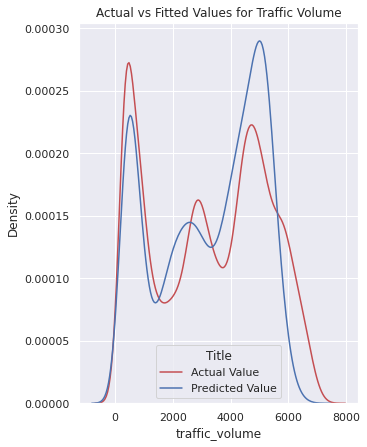

In [ ]:
import seaborn as sns
plt.figure(figsize=(5, 7))
graph = sns.distplot(y, hist=False, color="r")
sns.distplot(Y_pred, hist=False, color="b" , ax=graph)
plt.title('Actual vs Fitted Values for Traffic Volume')
plt.legend(labels=["Actual Value","Predicted Value"], title = "Title")
plt.show()
plt.close()


In [ ]:
# RMSE error for Random Forest
print("RMSE",np.sqrt(mean_squared_error(y_test,Y_pred)))

RMSE 975.9161570597635


In [ ]:
# MAE error for Random Forest
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MAE",mean_absolute_error(y_test, Y_pred))

MAE 628.7409973686289


In [ ]:
#MSE Error for Random Forest
print("MSE",mean_squared_error(y_test,Y_pred))

MSE 952412.3456102968


In [ ]:
#Assign the SVR into svr variable
# Kernel for rbf
from sklearn.svm import SVR
svr=SVR(kernel='rbf')

In [ ]:
# Train the data using SVR
svr.fit(x_train,y_train)

SVR()

In [ ]:
# Predict the data using SVR
y_pred=svr.predict(x_test)

In [ ]:
# RMSE error for SVR (Kernel='rbf')
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 1987.5053642522112


In [ ]:
# MAE error for SVR (Kernel='rbf')
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MAE",mean_absolute_error(y_test, y_pred))

MAE 1739.4449726039911


In [ ]:
#MSE Error for SVR (Kernel='rbf')
print("MSE",mean_squared_error(y_test,y_pred))

MSE 3950177.572931315


In [ ]:
# Sigmoid Kernel for SVR
svr_s=SVR(kernel='sigmoid')

In [ ]:
# Train the data using SVR(Kernel='sigmoid')
svr_s.fit(x_train,y_train)

SVR(kernel='sigmoid')

In [ ]:
# Prediction using SVR(Kernel='sigmoid')
y_predict=svr_s.predict(x_test)

In [ ]:
# RMSE error for SVR (Kernel='sigmoid')
print("RMSE",np.sqrt(mean_squared_error(y_test,y_predict)))

RMSE 1987.6545149156746


In [ ]:
# MAE error for SVR (Kernel='sigmoid')
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MAE",mean_absolute_error(y_test, y_predict))

MAE 1739.6354619140293


In [ ]:
#MSE Error for SVR (Kernel='sigmoid')
print("MSE",mean_squared_error(y_test,y_predict))

MSE 3950770.4706646656


In [ ]:
# Polynomial kernel for svr
svr_p=SVR(kernel='poly')

In [ ]:
# Train the data using SVR (Kernel='poly')
svr_p.fit(x_train,y_train)

SVR(kernel='poly')

In [ ]:
y_predict1=svr_p.predict(x_test)

In [ ]:
# RMSE error SVR (Kernel='Poly')
print("RMSE",np.sqrt(mean_squared_error(y_test,y_predict1)))

RMSE 1987.2897096685883


In [ ]:
# MAE error SVR (Kernel='Poly')
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MAE",mean_absolute_error(y_test, y_predict1))

MAE 1739.2669324142362


In [ ]:
#MSE Error SVR (Kernel='Poly')
print("MSE",mean_squared_error(y_test,y_predict1))

MSE 3949320.3901546625


In [ ]:

svr_l=SVR(kernel='linear')

In [ ]:
# Train the data using SVR(Kernel='Linear')
svr_l.fit(x_train,y_train)

SVR(kernel='linear')

In [ ]:
ypred_svrl=svr_l.predict(x_test)

In [ ]:
# RMSE error for SVR (Kernel='linear')
print("RMSE",np.sqrt(mean_squared_error(y_test,ypred_svrl)))

RMSE 1870.9699514836914


In [ ]:
# MAE error for SVR (Kernel='linear')
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MAE",mean_absolute_error(y_test, ypred_svrl))

MAE 1532.076524577708


In [ ]:
#MSE Error for SVR (Kernel='linear')
print("MSE",mean_squared_error(y_test,ypred_svrl))

MSE 3500528.559354887


**Ensemble Learning Models [ Bagging Technique:- Random Forest & Bagging meta Estimator , Boosting Technique:- Ada Boost & XG Boost]**

In [ ]:
# Bagging meta estimator the base estimator is Decision Tree Regressor
from sklearn.ensemble import BaggingRegressor
from sklearn import tree
en_model=BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))

In [ ]:
# Train the data using Bagging meta-estimator algorithm
en_model.fit(x_train,y_train)

In [ ]:
# Predcit the data using Bagging meta estimator
y_predict2=en_model.predict(x_test)

In [ ]:
# RMSE error for base estimator is Decision Tree Regressor
print("RMSE",np.sqrt(mean_squared_error(y_test,y_predict2)))

RMSE 1014.5633577158242


In [ ]:
# MAE error for base estimator is Decision Tree Regressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MAE",mean_absolute_error(y_test, y_predict2))

MAE 646.4471408260746


In [ ]:
#MSE Error for base estimator is Decision Tree Regressor
print("MSE",mean_squared_error(y_test,y_predict2))

MSE 1029338.8068196074


In [ ]:
# Ensemble learning Bagging meta estimator the base estimator for SVR (Kernel='Linear')
from sklearn.ensemble import BaggingRegressor
from sklearn import svm
en_model1=BaggingRegressor(svm.SVR(kernel='linear'),random_state=1)

In [ ]:
# Train the data using Bagging meta estimator the base estimator for SVR (Kernel='Linear')
en_model1.fit(x_train,y_train)

BaggingRegressor(base_estimator=SVR(kernel='linear'), random_state=1)

In [ ]:
y_predict3=en_model1.predict(x_test)

In [ ]:
# RMSE error for Bagging meta estimator the base estimator for SVR (Kernel='Linear')
print("RMSE",np.sqrt(mean_squared_error(y_test,y_predict3)))

RMSE 1869.3803883692153


In [ ]:
# MAE error for Bagging meta estimator the base estimator for SVR (Kernel='Linear')
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MAE",mean_absolute_error(y_test, y_predict3))

MAE 1532.0186158700883


In [ ]:
#MSE Error for Bagging meta estimator the base estimator for SVR (Kernel='Linear')
print("MSE",mean_squared_error(y_test, y_predict3))

MSE 3494583.0364194387


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# AdaBoostRegressor
# Assign the AdaBoostRegressor to boost1 variable
# Train the data using AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
boost1=AdaBoostRegressor()
boost1.fit(x_train,y_train)

AdaBoostRegressor()

In [ ]:
#Predict the data using AdaBoostRegressor
y_predict4=boost1.predict(x_test)

In [ ]:
# RMSE error for Ada Boost Regressor
print("RMSE",np.sqrt(mean_squared_error(y_test,y_predict4)))

RMSE 1177.785661628743


In [ ]:
# MAE error for Ada Boost Regressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MAE",mean_absolute_error(y_test, y_predict4))

MAE 878.7961930118054


In [ ]:
#MSE Error for Ada Boost Regressor
print("MSE",mean_squared_error(y_test,y_predict4))

MSE 1387179.0647382555


In [ ]:
# Tuning the Adaboost Algorithm using Hyper parameters
parm_ada={
    'n_estimators':[100,500,1000,2000],
    'learning_rate':[.001,0.01,.1],
    'random_state':[1,10,42,96]
}

In [ ]:
# Using the GridSearchCV method for Tuning the Ada Boost Algorithm
model_ada=GridSearchCV(estimator=boost1,param_grid=parm_ada,n_jobs=-1,cv=3,scoring='neg_mean_squared_error')

In [ ]:
# Train the  Tuned Ada Boost Algorithm
model_ada.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=3, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [100, 500, 1000, 2000],
                         'random_state': [1, 10, 42, 96]},
             scoring='neg_mean_squared_error')

In [ ]:
# Find the Best Parameters AdaBoost Regressor
model_ada.best_params_

{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 1}

In [ ]:
# Tuning the Adaboost Regressor using hyperparameters
tuning_adaboost=AdaBoostRegressor(learning_rate=0.1,n_estimators=100,random_state=1)

In [ ]:
# Train the data using after tuning hyper parameters in Adaboost Regressor
tuning_adaboost.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.1, n_estimators=100, random_state=1)

In [ ]:
tuning_ada_pred=tuning_adaboost.predict(x_test)

In [ ]:
# RMSE error for Tuned Ada Boost Algorithm
print("RMSE",np.sqrt(mean_squared_error(y_test,tuning_ada_pred)))

RMSE 1194.2922588120002


In [ ]:
# MAE error for tuned Ada Boost Algorithm
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MAE",mean_absolute_error(y_test, tuning_ada_pred))

MAE 892.9804870810593


In [ ]:
#MSE Error for tuned Ada Boost Algorithm
print("MSE",mean_squared_error(y_test,tuning_ada_pred))

MSE 1426333.9994582697


In [ ]:
# XGBoost regressor
import xgboost as xgb
boost2=xgb.XGBRegressor()
boost2.fit(x_train,y_train)

[06:18:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
y_predict5=boost2.predict(x_test)

In [ ]:
# RMSE error for XGBoost regressor
print("RMSE",np.sqrt(mean_squared_error(y_test,y_predict5)))

# MAE error for XGBoost regressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MAE",mean_absolute_error(y_test, y_predict5))

#MSE Error for XGBoost regressor
print("MSE",mean_squared_error(y_test,y_predict5))

RMSE 1042.9211242844533
MAE 734.0259892618294
MSE 1087684.471478748


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the parameters for XGBoost algorithm
param_xgb={
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
}

In [ ]:
model_xgb=GridSearchCV(estimator=boost2,param_grid=param_xgb,n_jobs=-1,cv=3,verbose=1)

In [ ]:
model_xgb.fit(x_train,y_train)

**Tuning the models using Hyperparameters**

In [ ]:
# Define the the parameters for Randomforest
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [ ]:
# Instantiate GridSearchCV
model_gridsearch = GridSearchCV(estimator=forest, param_grid=param_grid,n_jobs=-1,cv=3,refit=True,return_train_score=True)

In [ ]:
# Train the Hyper Parameters tuned Random Forest algorithm
model_gridsearch.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             return_train_score=True)

In [ ]:
# Find the best parameters for hyper parameters tuned Random Forest Algorithm
model_gridsearch.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [ ]:
tuning_forest=RandomForestRegressor(n_estimators=300,max_depth=100,max_features=3,min_samples_leaf=3,bootstrap=True)

In [ ]:
tuning_forest.fit(x_train,y_train)

RandomForestRegressor(max_depth=100, max_features=3, min_samples_leaf=3,
                      n_estimators=300)

In [ ]:
forest_predict=tuning_forest.predict(x_test)

In [ ]:
# RMSE error for Tuned Random Forest Algorithm
print("RMSE",np.sqrt(mean_squared_error(y_test,forest_predict)))

# MAE error  for Tuned Random Forest Algorithm
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MAE",mean_absolute_error(y_test, forest_predict))

#MSE Error  for Tuned Random Forest Algorithm
print("MSE",mean_squared_error(y_test,forest_predict))

RMSE 1041.2922960853746
MAE 730.352696208208
MSE 1084289.6458867516


In [ ]:
# parameters defined for decision tree
parameters={
            "max_depth":[1,3,5,7],
            "min_samples_leaf":[1,2,3,4,5],
            "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
            "max_features":["auto","log2","sqrt",None],
            "max_leaf_nodes":[None,10,20,30,40,50]
            }

In [ ]:
tuning_model=GridSearchCV(des,param_grid=parameters,scoring='neg_mean_squared_error',cv=3)

In [ ]:
tuning_model.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5]},
             scoring='neg_mean_squared_error')

In [ ]:
tuning_model.best_estimator_

DecisionTreeRegressor(max_depth=5, max_features='auto',
                      min_weight_fraction_leaf=0.1)

In [ ]:
tuning_hyper_Des_model=DecisionTreeRegressor(max_depth=5,max_features='auto',min_weight_fraction_leaf=0.1)

In [ ]:
tuning_hyper_Des_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, max_features='auto',
                      min_weight_fraction_leaf=0.1)

In [ ]:
des_pred=tuning_hyper_Des_model.predict(x_test)

In [ ]:
# RMSE error for Tuned Decision Tree Algorithm
print("RMSE",np.sqrt(mean_squared_error(y_test,des_pred)))

RMSE 1256.2286547656681


In [ ]:
# MAE error for Tuned Decision Tree Algorithm
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MAE",mean_absolute_error(y_test, des_pred))

MAE 947.0911683388221


In [ ]:
#MSE Error for Tuned Decision Tree Algorithm
print("MSE",mean_squared_error(y_test,des_pred))

MSE 1578110.4330543603


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# parameters for support vector machine
params={'kernel':['linear','rbf','poly','sigmoid'],'C':[1,5,10],'gamma':['auto','scale']}

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr_gs=SVR()

In [ ]:
grid_svr=GridSearchCV(estimator=svr_gs,param_grid=params,verbose=2,n_jobs=-1,cv=3)

In [ ]:
grid_svr.fit(x_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [ ]:
grid_svr.best_params_

{'C': 5, 'gamma': 'auto', 'kernel': 'linear'}

In [ ]:
tuning_svr=SVR(C=5,gamma='auto',kernel='linear')

In [ ]:
tuning_svr.fit(x_train,y_train)

SVR(C=5, gamma='auto', kernel='linear')

In [ ]:
svr_pred=tuning_svr.predict(x_test)

In [ ]:
# RMSE error for tuned SVR
print("RMSE",np.sqrt(mean_squared_error(y_test,svr_pred)))

# MAE error for tuned SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MAE",mean_absolute_error(y_test, svr_pred))

#MSE Error for tuned SVR
print("MSE",mean_squared_error(y_test,svr_pred))

RMSE 1868.086663200336
MAE 1529.420693555745
MSE 3489747.7812269656


**Deep learning Model [LSTM - Long Short Term Memory]**

In [ ]:
# import the keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
# Build the LSTM Model
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_absolute_error')

In [ ]:
# Train the LSTM Model
regressor.fit(x_train, y_train, epochs = 500, batch_size = 32)

In [ ]:
# Predict the value using LSTM
lstm_pred=regressor.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# RMSE error for LSTM Regressor
print("RMSE",np.sqrt(mean_squared_error(y_test,lstm_pred)))

# MAE error for LSTM Regressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MAE",mean_absolute_error(y_test, lstm_pred))

#MSE Error for LSTM Regressor
print("MSE",mean_squared_error(y_test,lstm_pred))

In [ ]:
RMSE 1987.5148005747455
MAE 1739.685762172541
MSE 3950215.082503671

**Given the new input to predict a Traffic Volume**

In [ ]:
import pandas as pd
traffic_df=pd.DataFrame(columns=["date","holiday","temp","snow_1h","clouds_all","weekday","hour","month","year","fog","haze","mist","thunderstorm","rain_1h"])
no_times=int(input("Enter the no.of Times"))

Enter the no.of Times1


In [ ]:
for _ in range(no_times):
  dt=input("Enter the Date:")
  hday=input("Enter the Holiday or not:")
  tp=input("Enter the Temperature:")
  sh=input("Enter the Snow or not:")
  cd=input("Enter the clouds range:")
  wk=input("Enter the weeekday:")
  hr=input("Enter the hour:")
  mt=int(input("Enter the month:"))
  yr=int(input("Enter the Year:"))
  fg=input("Enter the fog or not:")
  hz=input("Enter the haze or not:")
  ms=input("Enter the mist or not:")
  th=input("Enter the thunder or not:")
  rh=input("Enter the rain level:")

  df1=pd.DataFrame(data=[[dt,hday,tp,sh,cd,wk,hr,mt,yr,fg,hz,ms,th,rh]],columns=["date","holiday","temp","snow_1h","clouds_all","weekday","hour","month","year","fog","haze","mist","thunderstorm","rain_1h"])
  traffic_df=pd.concat([traffic_df,df1],axis=0)

traffic_df.index=range(len(traffic_df.index))
print(traffic_df)

Enter the Date:2022-06-04
Enter the Holiday or not:False
Enter the Temperature:30.98
Enter the Snow or not:no_snow
Enter the clouds range:45
Enter the weeekday:5
Enter the hour:Morning
Enter the month:6
Enter the Year:2022
Enter the fog or not:no_fog
Enter the haze or not:no_haze
Enter the mist or not:no_mist
Enter the thunder or not:no_thunder
Enter the rain level:no_rain
         date holiday   temp  snow_1h clouds_all weekday     hour month  year  \
0  2022-06-04   False  30.98  no_snow         45       5  Morning     6  2022   

      fog     haze     mist thunderstorm  rain_1h  
0  no_fog  no_haze  no_mist   no_thunder  no_rain  


In [ ]:
traffic_df

,date,holiday,temp,snow_1h,clouds_all,weekday,hour,month,year,fog,haze,mist,thunderstorm,rain_1h
0,2022-06-04,False,30.98,no_snow,45,5,Morning,6,2022,no_fog,no_haze,no_mist,no_thunder,no_rain


In [ ]:
def encode_holiday(x):
  if x=='True':
    return 1;
  else:
    return 0;

traffic_df['holiday']=traffic_df.holiday.map(encode_holiday);

In [ ]:
def encode_snow(x):
  if x=='snow':
    return 1;
  else:
    return 0;

traffic_df['snow_1h']=traffic_df.snow_1h.map(encode_snow);

In [ ]:
def encode_haze(x):
  if x=='haze':
    return 0;
  else:
    return 1;

traffic_df['haze']=traffic_df.haze.map(encode_haze);

In [ ]:
def encode_fog(x):
  if x=='fog':
    return 0;
  else:
    return 1;

traffic_df['fog']=traffic_df.fog.map(encode_fog);

In [ ]:
def encode_mist(x):
  if x=='mist':
    return 0;
  else:
    return 1;

traffic_df['mist']=traffic_df.mist.map(encode_mist);

In [ ]:
def encode_thunder(x):
  if x=='thunder':
    return 1;
  else:
    return 0;

traffic_df['thunderstorm']=traffic_df.thunderstorm.map(encode_thunder);

In [ ]:
def encode_rain(x):
  if x=='no_rain':
    return 3;
  elif x=='light':
    return 1;
  elif x=='moderate':
    return 2;
  else:
    return 0;

traffic_df['rain_1h']=traffic_df.rain_1h.map(encode_rain);

In [ ]:
def encode_hour(x):
  if x=='Morning':
    return 4;
  elif x=='Afternoon':
    return 0;
  elif x=='Early_Morning':
    return 1;
  elif x=='Evening':
    return 2;
  elif x=='Night':
    return 5;
  else:
    return 3;

traffic_df['hour']=traffic_df.hour.map(encode_hour);

In [ ]:
def encode_day(x):
  if x==0:
    return 0;
  elif x==1:
    return 1;
  elif x==2:
    return 2;
  elif x==3:
    return 3;
  elif x==4:
    return 4;
  elif x==5:
    return 5;
  else:
    return 6;

traffic_df['weekday']=traffic_df.weekday.map(encode_day);

In [ ]:
def encode_month(x):
  if x==1:
    return 0;
  elif x==2:
    return 1;
  elif x==3:
    return 2;
  elif x==4:
    return 3;
  elif x==5:
    return 4;
  elif x==6:
    return 5;
  elif x==7:
    return 6;
  elif x==8:
    return 7;
  elif x==9:
    return 8;
  elif x==10:
    return 9;
  elif x==11:
    return 10;
  else:
    return 11;

traffic_df['month']=traffic_df.month.map(encode_month);

In [ ]:
traffic_df.head()

,date,holiday,temp,snow_1h,clouds_all,weekday,hour,month,year,fog,haze,mist,thunderstorm,rain_1h
0,2022-06-04,0,30.98,0,45,6,4,5,2022,1,1,1,0,3


In [ ]:
# sample prediction for Decision tree
traffic_df.set_index('date',inplace=True)

In [ ]:
# Perfect prediction for best regressor of our project (Random Forest)
out1=forest.predict(traffic_df)
print(out1)

[3628.24]
